In [4]:
import pandas as pd

df = pd.read_csv('sample_data/Stock Forecasting Dataset.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-26,51.218750,51.750000,49.562500,49.687500,30.637007,49365000
1,2000-01-27,49.945313,50.593750,48.625000,49.375000,30.444324,63654800
2,2000-01-28,49.062500,50.125000,48.625000,49.125000,30.290176,58225400
3,2000-01-31,48.812500,49.093750,47.437500,48.937500,30.174562,73194200
4,2000-02-01,49.250000,51.625000,48.843750,51.468750,31.735323,70196600
...,...,...,...,...,...,...,...
6180,2024-08-20,421.700012,425.859985,421.640015,424.799988,424.799988,16387600
6181,2024-08-21,424.079987,426.399994,421.720001,424.140015,424.140015,16067300
6182,2024-08-22,424.359985,426.790009,414.609985,415.549988,415.549988,19361900
6183,2024-08-23,416.980011,419.260010,412.089996,416.790009,416.790009,18473000


In [5]:
df = df[['Date','Open','Close']]
df["Temp"]= df["Date"]
df

<ipython-input-5-adb110d96838>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Temp"]= df["Date"]


,Date,Open,Close,Temp
0,2000-01-26,51.218750,49.687500,2000-01-26
1,2000-01-27,49.945313,49.375000,2000-01-27
2,2000-01-28,49.062500,49.125000,2000-01-28
3,2000-01-31,48.812500,48.937500,2000-01-31
4,2000-02-01,49.250000,51.468750,2000-02-01
...,...,...,...,...
6180,2024-08-20,421.700012,424.799988,2024-08-20
6181,2024-08-21,424.079987,424.140015,2024-08-21
6182,2024-08-22,424.359985,415.549988,2024-08-22
6183,2024-08-23,416.980011,416.790009,2024-08-23


In [6]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-06-03')
datetime_object

datetime.datetime(2022, 6, 3, 0, 0)

In [7]:
df

,Date,Open,Close,Temp
0,2000-01-26,51.218750,49.687500,2000-01-26
1,2000-01-27,49.945313,49.375000,2000-01-27
2,2000-01-28,49.062500,49.125000,2000-01-28
3,2000-01-31,48.812500,48.937500,2000-01-31
4,2000-02-01,49.250000,51.468750,2000-02-01
...,...,...,...,...
6180,2024-08-20,421.700012,424.799988,2024-08-20
6181,2024-08-21,424.079987,424.140015,2024-08-21
6182,2024-08-22,424.359985,415.549988,2024-08-22
6183,2024-08-23,416.980011,416.790009,2024-08-23


In [8]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-8-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


,Date
0,2000-01-26
1,2000-01-27
2,2000-01-28
3,2000-01-31
4,2000-02-01
...,...
6180,2024-08-20
6181,2024-08-21
6182,2024-08-22
6183,2024-08-23


In [9]:
df.index = df.pop('Date')
df

,Open,Close,Temp
Date,,,
2000-01-26,51.218750,49.687500,2000-01-26
2000-01-27,49.945313,49.375000,2000-01-27
2000-01-28,49.062500,49.125000,2000-01-28
2000-01-31,48.812500,48.937500,2000-01-31
2000-02-01,49.250000,51.468750,2000-02-01
...,...,...,...
2024-08-20,421.700012,424.799988,2024-08-20
2024-08-21,424.079987,424.140015,2024-08-21
2024-08-22,424.359985,415.549988,2024-08-22


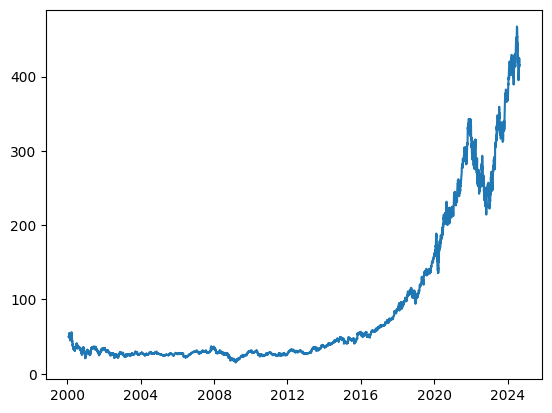

In [10]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [11]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y, Z, Q, V = [], [], [], [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    opens = df_subset['Open'].to_numpy()
    times = df_subset['Temp']
    x, y = values[:-1], values[-1]
    z = opens[-1]
    q = times[-1]
    dates.append(target_date)
    X.append(x)
    Y.append(y)
    Z.append(z)
    month= int(str(q).split("-")[1])
    V.append(month)
    if(month>=1 and month <=3):
      Q.append(1)
    if(month>=4 and month <=6):
      Q.append(2)
    if(month>=7 and month <=9):
      Q.append(3)
    if(month>=10 and month <=12):
      Q.append(4)
    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_do = pd.DataFrame({})
  ret_dt = pd.DataFrame({})
  ret_df['Target Date'] = dates
  ret_do['Target Date'] = dates
  ret_dt['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  for i in range(0, n):
    X[:, i]
    ret_do[f'Target-{n-i}'] = X[:, i]
  for i in range(0, n):
    X[:, i]
    ret_dt[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y
  ret_do['Target'] = Y
  ret_dt['Target'] = Y
  ret_do['Open']= Z
  ret_dt['Quarter']= Q
  ret_dt["Month"] = V
  return ret_df, ret_do, ret_dt

# Start day second time around: '2021-12-03', stop day '2024-06-03'
windowed_df, windowed_do, windowed_dt = df_to_windowed_df(df,
                                '2021-12-03',
                                '2024-06-03',
                                n=5)

<ipython-input-11-345b39c20adb>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  q = times[-1]


In [12]:
windowed_df = windowed_df[['Target Date', 'Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1', 'Target']]
windowed_df

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2021-12-03,329.679993,336.630005,330.589996,330.079987,329.489990,323.010010
1,2021-12-06,336.630005,330.589996,330.079987,329.489990,323.010010,326.190002
2,2021-12-07,330.589996,330.079987,329.489990,323.010010,326.190002,334.920013
3,2021-12-08,330.079987,329.489990,323.010010,326.190002,334.920013,334.970001
4,2021-12-09,329.489990,323.010010,326.190002,334.920013,334.970001,333.100006
...,...,...,...,...,...,...,...
622,2024-05-28,425.339996,429.040009,430.519989,427.000000,430.160004,430.320007
623,2024-05-29,429.040009,430.519989,427.000000,430.160004,430.320007,429.170013
624,2024-05-30,430.519989,427.000000,430.160004,430.320007,429.170013,414.670013
625,2024-05-31,427.000000,430.160004,430.320007,429.170013,414.670013,415.130005


In [13]:
windowed_do = windowed_do[['Target Date', 'Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1', 'Open', 'Target']]
windowed_do

,Target Date,Target-5,Target-4,Target-3,Target-2,Target-1,Open,Target
0,2021-12-03,329.679993,336.630005,330.589996,330.079987,329.489990,331.989990,323.010010
1,2021-12-06,336.630005,330.589996,330.079987,329.489990,323.010010,323.950012,326.190002
2,2021-12-07,330.589996,330.079987,329.489990,323.010010,326.190002,331.640015,334.920013
3,2021-12-08,330.079987,329.489990,323.010010,326.190002,334.920013,335.309998,334.970001
4,2021-12-09,329.489990,323.010010,326.190002,334.920013,334.970001,334.410004,333.100006
...,...,...,...,...,...,...,...,...
622,2024-05-28,425.339996,429.040009,430.519989,427.000000,430.160004,429.630005,430.320007
623,2024-05-29,429.040009,430.519989,427.000000,430.160004,430.320007,425.690002,429.170013
624,2024-05-30,430.519989,427.000000,430.160004,430.320007,429.170013,424.299988,414.670013
625,2024-05-31,427.000000,430.160004,430.320007,429.170013,414.670013,416.750000,415.130005


In [14]:
windowed_dt = windowed_dt[['Target Date', 'Month', 'Quarter','Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1','Target']]
windowed_dt

,Target Date,Month,Quarter,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2021-12-03,12,4,329.679993,336.630005,330.589996,330.079987,329.489990,323.010010
1,2021-12-06,12,4,336.630005,330.589996,330.079987,329.489990,323.010010,326.190002
2,2021-12-07,12,4,330.589996,330.079987,329.489990,323.010010,326.190002,334.920013
3,2021-12-08,12,4,330.079987,329.489990,323.010010,326.190002,334.920013,334.970001
4,2021-12-09,12,4,329.489990,323.010010,326.190002,334.920013,334.970001,333.100006
...,...,...,...,...,...,...,...,...,...
622,2024-05-28,5,2,425.339996,429.040009,430.519989,427.000000,430.160004,430.320007
623,2024-05-29,5,2,429.040009,430.519989,427.000000,430.160004,430.320007,429.170013
624,2024-05-30,5,2,430.519989,427.000000,430.160004,430.320007,429.170013,414.670013
625,2024-05-31,5,2,427.000000,430.160004,430.320007,429.170013,414.670013,415.130005


In [15]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

datesF, XF, yF = windowed_df_to_date_X_y(windowed_df)
datesO, XO, yO = windowed_df_to_date_X_y(windowed_do)
datesT, XT, yT = windowed_df_to_date_X_y(windowed_dt)
datesF.shape, XF.shape, yF.shape, datesO.shape, XO.shape, yO.shape, datesT.shape, XT.shape, yT.shape

((627,),
 (627, 5, 1),
 (627,),
 (627,),
 (627, 6, 1),
 (627,),
 (627,),
 (627, 7, 1),
 (627,))

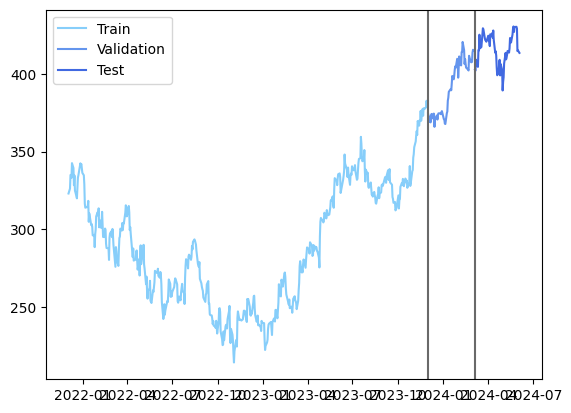

In [16]:
qF_80 = int(len(datesF) * .8)
qF_90 = int(len(datesF) * .9)

dates_trainF, X_trainF, y_trainF = datesF[:qF_80], XF[:qF_80], yF[:qF_80]

dates_valF, X_valF, y_valF = datesF[qF_80:qF_90], XF[qF_80:qF_90], yF[qF_80:qF_90]
dates_testF, X_testF, y_testF = datesF[qF_90:], XF[qF_90:], yF[qF_90:]

qO_80 = int(len(datesO) * .8)
qO_90 = int(len(datesO) * .9)

dates_trainO, X_trainO, y_trainO = datesO[:qO_80], XO[:qO_80], yO[:qO_80]

dates_valO, X_valO, y_valO = datesO[qO_80:qO_90], XO[qO_80:qO_90], yO[qO_80:qO_90]
dates_testO, X_testO, y_testO = datesO[qO_90:], XO[qO_90:], yO[qO_90:]


qT_80 = int(len(datesT) * .8)
qT_90 = int(len(datesT) * .9)

dates_trainT, X_trainT, y_trainT = datesT[:qT_80], XT[:qT_80], yT[:qT_80]

dates_valT, X_valT, y_valT = datesT[qT_80:qT_90], XT[qT_80:qT_90], yT[qT_80:qT_90]
dates_testT, X_testT, y_testT = datesT[qT_90:], XT[qT_90:], yT[qT_90:]

plt.plot(dates_trainF, y_trainF, color ='lightskyblue')

plt.plot(dates_valF, y_valF, color ='cornflowerblue')

plt.plot(dates_testF, y_testF, color ='royalblue')

plt.axvline(dates_valT[0], color = 'dimgrey', label = 'axvline - full height')
plt.axvline(dates_testT[0], color = 'dimgrey', label = 'axvline - full height')

plt.legend(['Train', 'Validation', 'Test'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import History

modelF = Sequential([layers.Input((4, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

modelF.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['mean_absolute_error'])

HistoryF = modelF.fit(X_trainF, y_trainF, validation_data=(X_valF, y_valF), epochs=300)


Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 84931.2344 - mean_absolute_error: 288.8561 - val_loss: 152296.6094 - val_mean_absolute_error: 389.8680
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 83695.2266 - mean_absolute_error: 286.7897 - val_loss: 150533.6250 - val_mean_absolute_error: 387.6005
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 82998.6484 - mean_absolute_error: 285.6459 - val_loss: 146228.7344 - val_mean_absolute_error: 382.0057
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79683.0312 - mean_absolute_error: 279.5551 - val_loss: 135193.8750 - val_mean_absolute_error: 367.2774
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 67277.5234 - mean_absolute_error: 256.3450 - val_loss: 111288.0312 - val_mean_absolute_error: 333.1400
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 47444.9258 - mean_absolute_error: 213.9244 - val_loss: 69171.7891 - val_mean_absolute_error: 262.4286
Epoch 7/300
16/16 ━━━━━

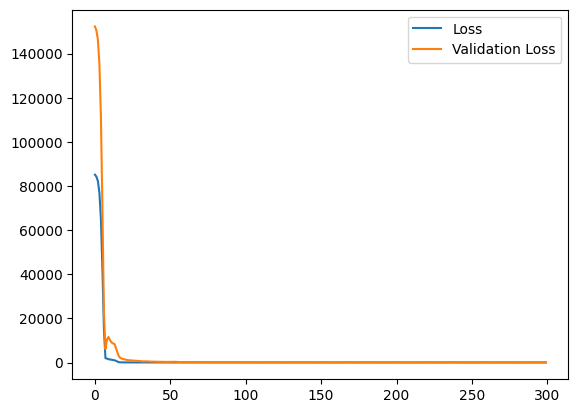

In [ ]:
FL=[]
FVL=[]
FTempL = HistoryF.history['loss']
FTempVL= HistoryF.history['val_loss']
for i in range(0, len(FTempVL)):
    FVL.append(FTempVL[i])
    FL.append(FTempL[i])
plt.plot(FL)
plt.plot(FVL)
plt.legend(['Loss', 'Validation Loss'])

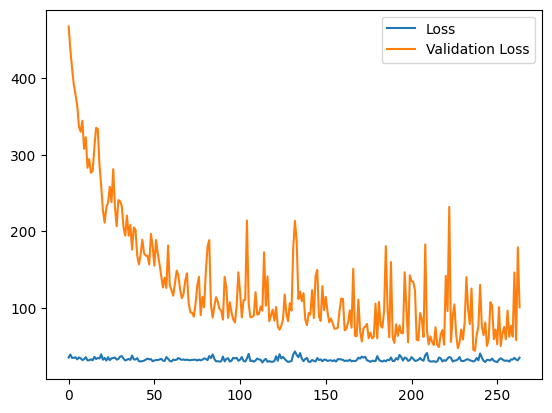

In [ ]:
FL=[]
FVL=[]
FTempL = HistoryF.history['loss']
FTempVL= HistoryF.history['val_loss']
for i in range(0, len(FTempVL)):
  if(FTempVL[i] < 500):
    FVL.append(FTempVL[i])
    FL.append(FTempL[i])
plt.plot(FL)
plt.plot(FVL)
plt.legend(['Loss', 'Validation Loss'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import History

modelO = Sequential([layers.Input((4, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

modelO.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['mean_absolute_error'])

HistoryO = modelO.fit(X_trainO, y_trainO, validation_data=(X_valO, y_valO), epochs=300)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 84218.2500 - mean_absolute_error: 287.6880 - val_loss: 151914.7656 - val_mean_absolute_error: 389.3781
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 83047.2344 - mean_absolute_error: 285.5658 - val_loss: 149628.0938 - val_mean_absolute_error: 386.4305
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 82117.4297 - mean_absolute_error: 284.0384 - val_loss: 144626.5625 - val_mean_absolute_error: 379.9025
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 78430.2812 - mean_absolute_error: 277.0886 - val_loss: 133021.1406 - val_mean_absolute_error: 364.3077
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 66134.1719 - mean_absolute_error: 254.2473 - val_loss: 108540.4453 - val_mean_absolute_error: 328.9969
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 46530.9141 - mean_absolute_error: 211.4858 - val_loss: 66222.3438 - val_mean_absolute_error: 256.7306
Epoch 7/300
16/16 ━━━━━

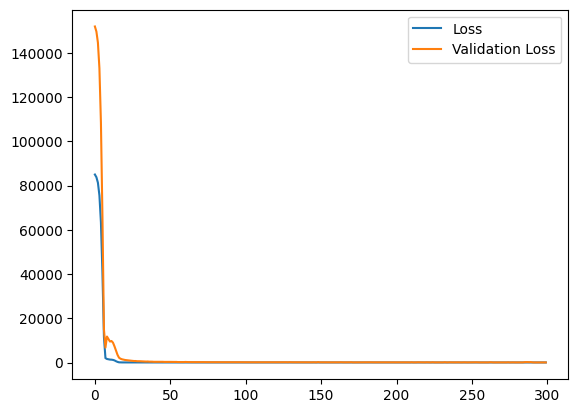

In [ ]:
OL=[]
OVL=[]
OTempL = HistoryO.history['loss']
OTempVL= HistoryO.history['val_loss']
for i in range(0, len(OTempVL)):
    OVL.append(OTempVL[i])
    OL.append(OTempL[i])
plt.plot(OL)
plt.plot(OVL)
plt.legend(['Loss', 'Validation Loss'])

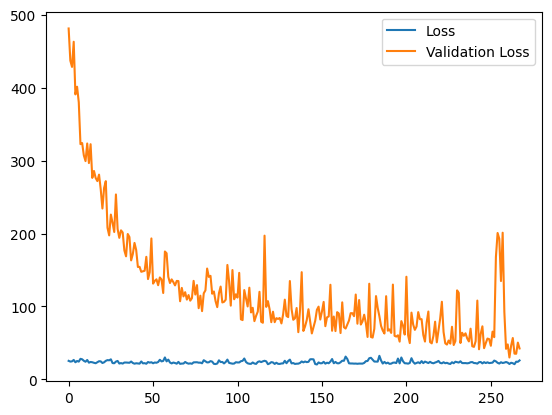

In [ ]:
OL=[]
OVL=[]
OTempL = HistoryO.history['loss']
OTempVL= HistoryO.history['val_loss']
for i in range(0, len(OTempVL)):
  if(OTempVL[i] < 500):
    OVL.append(OTempVL[i])
    OL.append(OTempL[i])
plt.plot(OL)
plt.plot(OVL)
plt.legend(['Loss', 'Validation Loss'])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.callbacks import History

modelT = Sequential([layers.Input((4, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

modelT.compile(loss='mse',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['mean_absolute_error'])

HistoryT = modelT.fit(X_trainT, y_trainT, validation_data=(X_valT, y_valT), epochs=300)

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 84803.1172 - mean_absolute_error: 288.5782 - val_loss: 152416.2344 - val_mean_absolute_error: 390.0207
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 86024.0156 - mean_absolute_error: 290.6205 - val_loss: 150820.4375 - val_mean_absolute_error: 387.9670
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 83398.6328 - mean_absolute_error: 286.2401 - val_loss: 147211.1094 - val_mean_absolute_error: 383.2780
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80410.8594 - mean_absolute_error: 280.8994 - val_loss: 137675.2500 - val_mean_absolute_error: 370.6015
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69520.9844 - mean_absolute_error: 260.7478 - val_loss: 112767.9688 - val_mean_absolute_error: 335.2858
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 47395.9883 - mean_absolute_error: 213.5742 - val_loss: 66670.2969 - val_mean_absolute_error: 257.3530
Epoch 7/300
16/16 ━━━━━

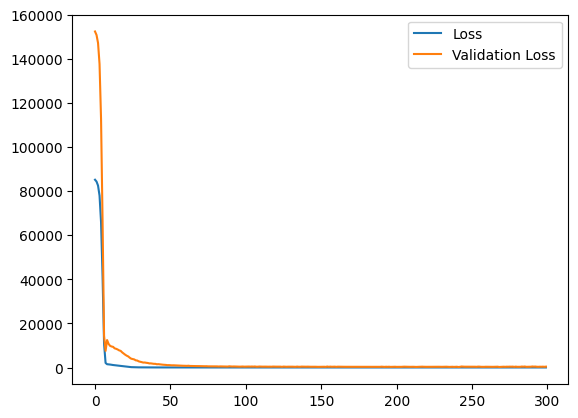

In [ ]:
TL=[]
TVL=[]
TTempL = HistoryT.history['loss']
TTempVL= HistoryT.history['val_loss']
for i in range(0, len(TTempVL)):
    TVL.append(TTempVL[i])
    TL.append(TTempL[i])
plt.plot(TL)
plt.plot(TVL)
plt.legend(['Loss', 'Validation Loss'])

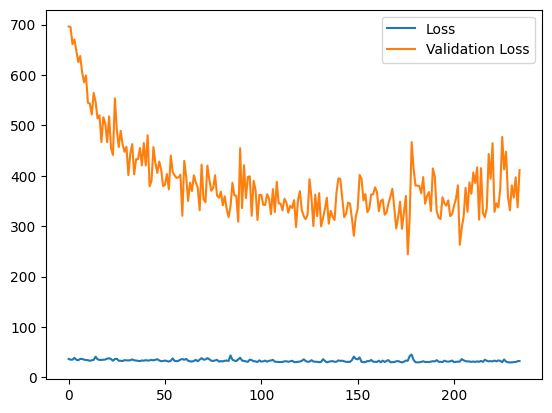

In [ ]:
TL=[]
TVL=[]
TTempL = HistoryT.history['loss']
TTempVL= HistoryT.history['val_loss']
for i in range(0, len(TTempVL)):
  if(TTempVL[i] < 700):
    TVL.append(TTempVL[i])
    TL.append(TTempL[i])
plt.plot(TL)
plt.plot(TVL)
plt.legend(['Loss', 'Validation Loss'])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


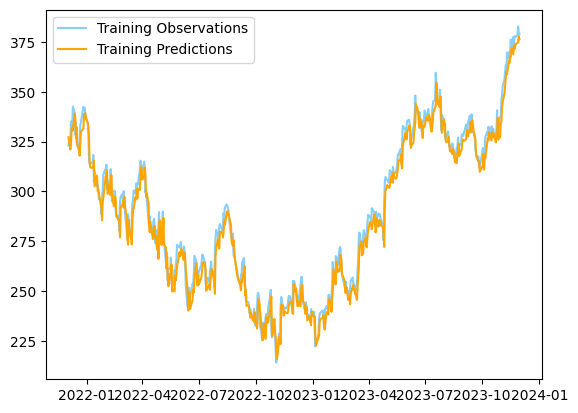

In [ ]:
train_predictionsF = modelF.predict(X_trainF).flatten()

plt.plot(dates_trainF, y_trainF, color='lightskyblue')
plt.plot(dates_trainF, train_predictionsF, color='orange')
plt.legend(['Training Observations','Training Predictions'])

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


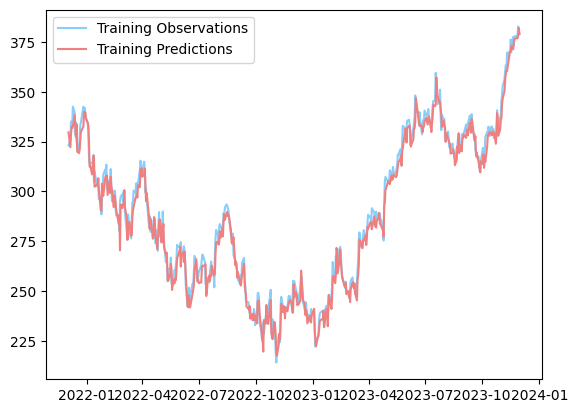

In [ ]:
train_predictionsO = modelO.predict(X_trainO).flatten()

plt.plot(dates_trainO, y_trainO, color='lightskyblue')
plt.plot(dates_trainO, train_predictionsO, color='lightcoral')
plt.legend(['Training Observations','Training Predictions'])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


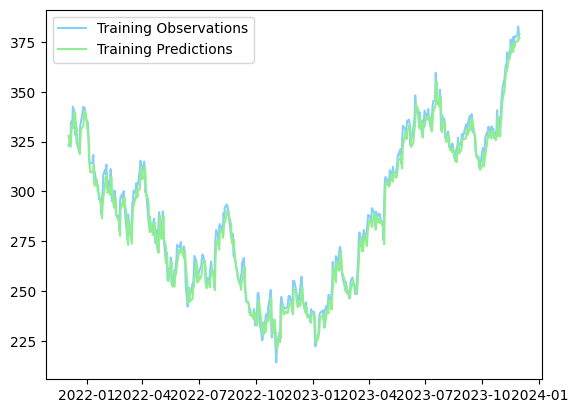

In [ ]:
train_predictionsT = modelT.predict(X_trainT).flatten()

plt.plot(dates_trainT, y_trainT, color='lightskyblue')
plt.plot(dates_trainT, train_predictionsT, color='lightgreen')
plt.legend(['Training Observations','Training Predictions'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


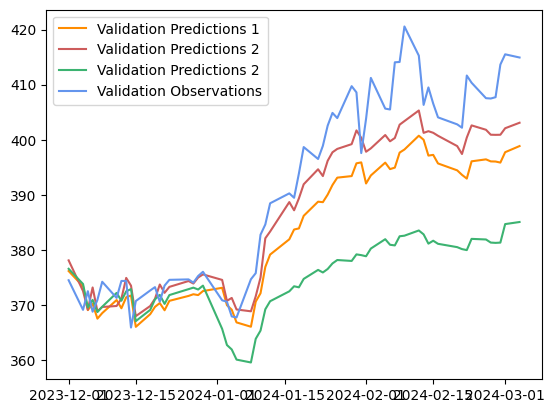

In [ ]:
val_predictionsF = modelF.predict(X_valF).flatten()
val_predictionsO = modelO.predict(X_valO).flatten()
val_predictionsT = modelT.predict(X_valT).flatten()
plt.plot(dates_valF, val_predictionsF, color='darkorange')
plt.plot(dates_valO, val_predictionsO, color='indianred')
plt.plot(dates_valT, val_predictionsT, color='mediumseagreen')
plt.plot(dates_valF, y_valF, color='cornflowerblue')
plt.legend(['Validation Predictions 1', 'Validation Predictions 2', 'Validation Predictions 2','Validation Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


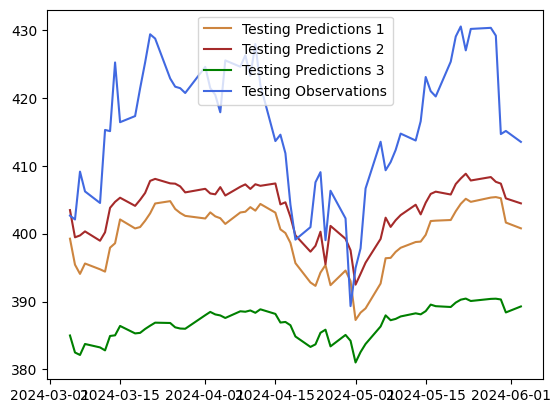

In [ ]:
test_predictionsF = modelF.predict(X_testF).flatten()
test_predictionsO = modelO.predict(X_testO).flatten()
test_predictionsT = modelT.predict(X_testT).flatten()
plt.plot(dates_testF, test_predictionsF, color='peru')
plt.plot(dates_testO, test_predictionsO, color='brown')
plt.plot(dates_testT, test_predictionsT, color='green')
plt.plot(dates_testF, y_testF, color='royalblue')
plt.legend(['Testing Predictions 1', 'Testing Predictions 2', 'Testing Predictions 3','Testing Observations'])

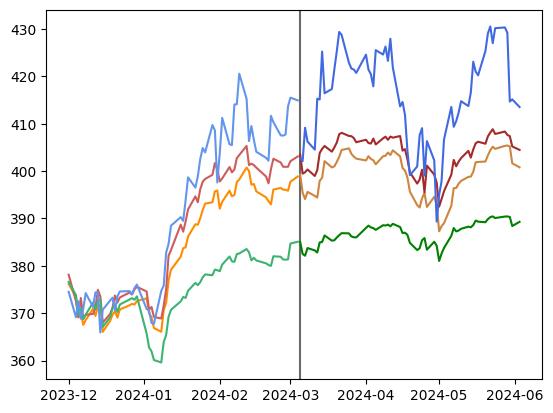

In [ ]:
plt.plot(dates_valF, val_predictionsF, color='darkorange')
plt.plot(dates_valO, val_predictionsO, color='indianred')
plt.plot(dates_valT, val_predictionsT, color='mediumseagreen')
plt.plot(dates_valF, y_valF, color='cornflowerblue')
plt.axvline(dates_testT[0], color = 'dimgrey', label = 'axvline - full height')
plt.plot(dates_testF, test_predictionsF, color='peru')
plt.plot(dates_testO, test_predictionsO, color='brown')
plt.plot(dates_testT, test_predictionsT, color='green')
plt.plot(dates_testF, y_testF, color='royalblue')

#plt.legend(['Validation Predictions 1', 'Validation Predictions 2', 'Validation Predictions 3', 'Validation Observations', 'Testing Predictions 1', 'Testing Predictions 2', 'Testing Predictions 3', 'Testing Observations'])


In [ ]:
from sklearn.metrics import mean_absolute_error

maeF = mean_absolute_error(y_testF, test_predictionsF)
maeO = mean_absolute_error(y_testO, test_predictionsO)
maeT = mean_absolute_error(y_testT, test_predictionsT)
maeF, maeO, maeT

(16.501884, 12.433772, 29.0745)

In [ ]:
from sklearn.metrics import mean_squared_error

mseF = mean_squared_error(y_testF, test_predictionsF)
mseO = mean_squared_error(y_testO, test_predictionsO)
mseT = mean_squared_error(y_testT, test_predictionsT)
mseF, mseO, mseT

(312.77386, 193.2489, 916.8179)

In [ ]:
from sklearn.metrics import mean_squared_error

rmsF = mean_squared_error(y_testF, test_predictionsF, squared=False)
rmsO = mean_squared_error(y_testO, test_predictionsO, squared=False)
rmsT = mean_squared_error(y_testT, test_predictionsT, squared=False)
rmsF, rmsO, rmsT

(17.685413, 13.9014, 30.279001)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mapeF = mean_absolute_percentage_error(y_testF, test_predictionsF)
mapeO = mean_absolute_percentage_error(y_testO, test_predictionsO)
mapeT = mean_absolute_percentage_error(y_testT, test_predictionsT)
mapeF, mapeO, mapeT

(0.039368603, 0.029584805, 0.069478184)

In [24]:
from sklearn.model_selection import train_test_split
windowed_df['Timestamp'] = windowed_df['Target Date'].astype(int)
windowed_df['Timestamp'] = windowed_df['Timestamp'].div(10**9)
XLF = windowed_df[['Timestamp','Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1']]
yLF = windowed_df['Target']

X_trainLF, X_testLF, y_trainLF, y_testLF = train_test_split(XLF,yLF,test_size=0.2, random_state=42, shuffle = False)

windowed_do['Timestamp'] = windowed_do['Target Date'].astype(int)
windowed_do['Timestamp'] = windowed_do['Timestamp'].div(10**9)
XLO = windowed_do[['Timestamp','Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1','Open']]
yLO = windowed_do['Target']

X_trainLO, X_testLO, y_trainLO, y_testLO = train_test_split(XLO,yLO,test_size=0.2, random_state=42, shuffle = False)

windowed_dt['Timestamp'] = windowed_dt['Target Date'].astype(int)
windowed_dt['Timestamp'] = windowed_dt['Timestamp'].div(10**9)
XLT = windowed_dt[['Timestamp','Month', 'Quarter','Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1']]
yLT = windowed_dt['Target']

X_trainLT, X_testLT, y_trainLT, y_testLT = train_test_split(XLT,yLT,test_size=0.2, random_state=42, shuffle = False)

XRT= windowed_do[['Target Date','Target-5', 'Target-4', 'Target-3', 'Target-2', 'Target-1','Open']]
X_trainRT, X_testRT, y_trainRT, y_testRT = train_test_split(XRT,yLT,test_size=0.2, random_state=42, shuffle = False)

In [25]:
from sklearn.linear_model import LinearRegression


lmF = LinearRegression()
lmF.fit(X_trainLF, y_trainLF)

lmO = LinearRegression()
lmO.fit(X_trainLO, y_trainLO)

lmT = LinearRegression()
lmT.fit(X_trainLT, y_trainLT)

LinearRegression()

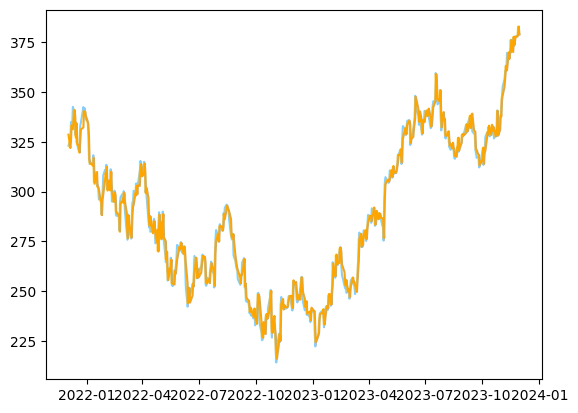

In [33]:
import seaborn as sns

predictionsLF = lmF.predict(X_trainLF)
predictionsLO = lmO.predict(X_trainLO)
predictionsLT = lmT.predict(X_trainLT)
plt.plot(X_trainRT['Target Date'], y_trainLF, color='lightskyblue')
plt.plot(X_trainRT['Target Date'], predictionsLF, color='orange')

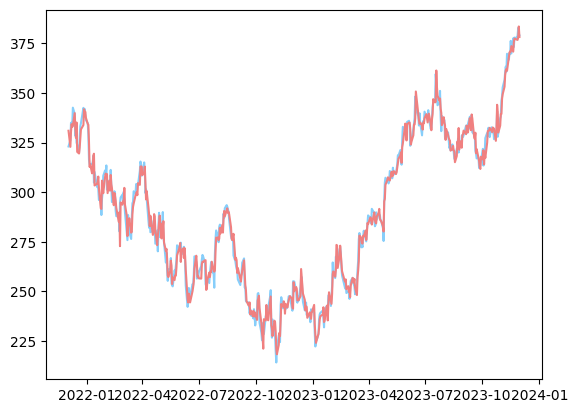

In [31]:
import seaborn as sns

predictionsLF = lmF.predict(X_trainLF)
predictionsLO = lmO.predict(X_trainLO)
predictionsLT = lmT.predict(X_trainLT)
plt.plot(X_trainRT['Target Date'], y_trainLF, color='lightskyblue')
plt.plot(X_trainRT['Target Date'], predictionsLO, color='lightcoral')

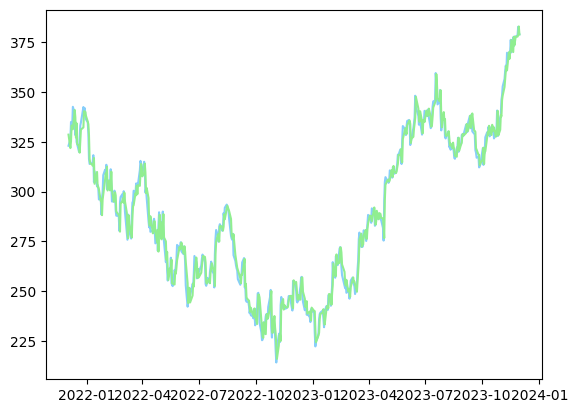

In [32]:
import seaborn as sns

predictionsLF = lmF.predict(X_trainLF)
predictionsLO = lmO.predict(X_trainLO)
predictionsLT = lmT.predict(X_trainLT)
plt.plot(X_trainRT['Target Date'], y_trainLF, color='lightskyblue')
plt.plot(X_trainRT['Target Date'], predictionsLT, color='lightgreen')

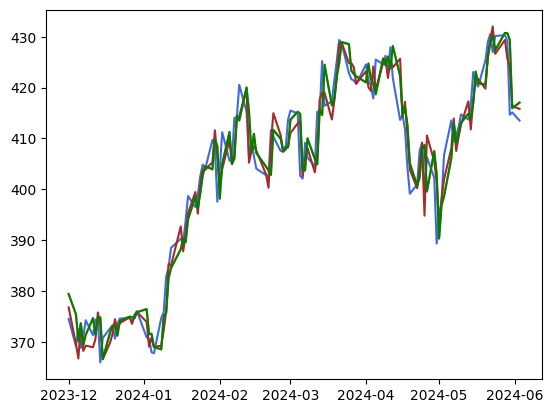

In [36]:
import seaborn as sns

predictionsLF = lmF.predict(X_testLF)
predictionsLO = lmO.predict(X_testLO)
predictionsLT = lmT.predict(X_testLT)
plt.plot(X_testRT['Target Date'], y_testLF, color='royalblue')
plt.plot(X_testRT['Target Date'], predictionsLF, color='peru')
plt.plot(X_testRT['Target Date'], predictionsLO, color='brown')
plt.plot(X_testRT['Target Date'], predictionsLT, color='green')

In [37]:
from sklearn.metrics import mean_absolute_error

maeF = mean_absolute_error(y_testLF, predictionsLF)
maeO = mean_absolute_error(y_testLO, predictionsLO)
maeT = mean_absolute_error(y_testLT, predictionsLT)
maeF, maeO, maeT

(3.662809041142448, 3.135250315176768, 3.6659563795157633)

In [39]:
from sklearn.metrics import mean_squared_error

mseF = mean_squared_error(y_testLF, predictionsLF)
mseO = mean_squared_error(y_testLO, predictionsLO)
mseT = mean_squared_error(y_testLT, predictionsLT)
mseF, mseO, mseT

(22.935208340344147, 15.933287721332674, 22.917315210777502)

In [40]:
from sklearn.metrics import mean_squared_error

rmsF = mean_squared_error(y_testLF, predictionsLF, squared=False)
rmsO = mean_squared_error(y_testLO, predictionsLO, squared=False)
rmsT = mean_squared_error(y_testLT, predictionsLT, squared=False)
rmsF, rmsO, rmsT

(4.7890717618703675, 3.9916522545598423, 4.787203276525607)

In [41]:
from sklearn.metrics import mean_absolute_percentage_error

mapeF = mean_absolute_percentage_error(y_testLF, predictionsLF)
mapeO = mean_absolute_percentage_error(y_testLO, predictionsLO)
mapeT = mean_absolute_percentage_error(y_testLT, predictionsLT)
mapeF, mapeO, mapeT

(0.009074524464218648, 0.007780645305684931, 0.009082291604508233)